In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 1d

In [ ]:
class SGD:
    def __init__(self,I,x_lim,a_lim,x=None,a=None,eta=1):
        self.I=I
        self.x_lim=x_lim
        self.a_lim=a_lim
        self.eta=eta
        self.i_range=np.arange(7)-3
        self.x=initialize_params([x_lim]) if x is None else x
        self.a=initialize_params([a_lim]) if a is None else a
        # self.x,self.a=initialize_params(np.array([x_lim,a_lim]))
        self.I_1=diff(I)
    


    def generate_x_i(self):
        return np.round(self.i_range*self.a+self.x).astype(int)
    def loss(self):
        x_i=self.generate_x_i()
        
        return np.sum(self.I[x_i])

    def grad(self):
        x_i=self.generate_x_i()
        loss_a=np.sum(self.I_1[x_i]*self.i_range)
        loss_x=np.sum(self.I_1[x_i])
        return np.array([loss_x,loss_a])
    def fit(self):
        loss_prev=0
        loss_new=self.loss()
        while np.abs(loss_new-loss_prev)>1e-5:
            gradient=self.grad()
            self.x,self.a=np.r_[self.x,self.a]+self.eta*gradient
            loss_prev=loss_new
            loss_new=self.loss()
        print(loss_new)

def initialize_params(lim):
    return [int(np.round(np.random.uniform(low=l[0],high=l[1]))) for l in lim]
def diff(I):
    return I[1:]-I[:-1]


In [ ]:
def generate_int(Q,r):
    return np.cos(Q*r)+.5*np.cos(2.1*Q*r)

In [ ]:
x=np.linspace(-20,20,1001)
y=generate_int(np.array([1]), x)

In [ ]:
plt.plot(y)
plt.axvline(x=500)
plt.axvline(x=650)

In [ ]:
x_lim=[485,515]
a_lim=[145,155]
sgd=SGD(y, x_lim, a_lim,x=500)
sgd.fit()

In [ ]:
fig,ax=plt.subplots()
ax.plot(y)
ax.scatter(sgd.generate_x_i(),y[sgd.generate_x_i()],color='r')

# 2d

In [ ]:
import h5py
import matplotlib.colors as colors


In [ ]:
workingdir='/home/shared/STEM_sample_2/'
f=h5py.File(workingdir+'data.hdf5','r')
I,T=f['I'],f['T']


In [ ]:
# x,y=190,5
x,y=65,65
T_idx=0
data=I[T_idx,x,y,:,:]

In [ ]:
fig,ax=plt.subplots(figsize=(4,4),tight_layout=True)


# vmin,vmax=max(I[:,x,y].min(),1),I[:,x,y].max()
# vmin,vmax=data.min(),data.max()
# im=ax.imshow(data*mask,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax))
mask_Bragg=np.where(com.generate_mask()==1,1,np.nan)
im=ax.imshow(np.log10(data+1)*mask_Bragg,cmap='gray',)
axins=ax.inset_axes([1.05,0,.07,1],transform=ax.transAxes)
tit=ax.set_title('T={:d} K'.format(T[T_idx]+273))
cb=plt.colorbar(im,cax=axins)
cb.ax.set_title(r'$ I(k_x,k_y) $')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
# ax.axvline(x=80,color='b',ls='dashed')
# ax.axvline(x=86,color='b',ls='dashed')
# ax.axhline(y=50,color='y',ls='dashed')
# ax.axhline(y=55,color='y',ls='dashed')

# ax.axvline(x=63,color='b',ls='dashed')
# ax.axvline(x=68,color='b',ls='dashed')
# ax.axhline(y=26,color='y',ls='dashed')
# ax.axhline(y=31,color='y',ls='dashed')

# ax.axvline(x=50,color='b',ls='dashed')
# ax.axvline(x=58,color='b',ls='dashed')
# ax.axhline(y=50,color='y',ls='dashed')
# ax.axhline(y=58,color='y',ls='dashed')
# x_i=sgd_2d.generate_x_i()

# x_i=com.generate_x_i()
# ax.scatter(x_i[:,1],x_i[:,0],color='b',s=2)
com=COM(data=data)
com_i=com.generate_com()
ax.scatter(com_i[:,1],com_i[:,0],color='r',s=2)
# for idx,xy in enumerate(com_i):
#     x,y=xy
#     ax.text(y,x,str(idx))

In [ ]:
for idx,xy in com_i:
    print(xy)

In [ ]:
g1=sgd_2d.b1-sgd_2d.k

In [ ]:
g2=sgd_2d.b2-sgd_2d.k

In [ ]:
np.linalg.norm(g1),np.linalg.norm(g2)

In [ ]:
g1@g2/(np.linalg.norm(g1)*np.linalg.norm(g2))

In [ ]:
sgd_2d.k_lim

In [ ]:
class SGD_2D:
    def __init__(self,I,k_lim,b1_lim,b2_lim,k=None,b1=None,b2=None,eta=1):
        '''
        I: input with linear scale, using log scale
        k: position of the center Bragg peak
        b1: reciprocal lattice vector pointing to the right
        b2: reciprocal lattice vector pointing to the top
        k_lim: [[kx_min,kx_max],[ky_min,ky_max]]
        b1_lim: [[b1x_min,b1x_max],[b1y_min,b1y_max]]
        b2_lim: [[b2x_min,b2x_max],[b2y_min,b2y_max]]
        '''
        self.I,self.k_lim,self.b1_lim,self.b2_lim,self.eta=np.log10(I),k_lim,b1_lim,b2_lim, eta
        # self.i_range=np.array([[-2,2],[-1,2],
        #                        [-2,1],[-1,1],[0,1],[1,1],
        #                        [-1,0],[0,0],[1,0],
        #                        [-1,-1],[0,-1],[1,-1],[2,-1],
        #                        [1,-2],[2,-2]])
        self.i_range=np.array([
                               [-1,1],[0,1],
                               [-1,0],[0,0],[1,0],
                               [0,-1],[1,-1]])
        self.k=np.array(initialize_params(k_lim)) if k is None else k
        self.b1=np.array(initialize_params(b1_lim)) if b1 is None else b1
        self.b2=np.array(initialize_params(b2_lim)) if b2 is None else b2
        # self.g1=self.b1-self.k
        # self.g2=self.b2-self.k
        self.I_1,self.I_2=np.gradient(self.I)
        # self.I_1=np.gradient(self.I,0)
        # self.I_2=np.gradient(self.I,1)
        # self.I_1=self.I[1:,:]-self.I[:-1,:]
        # self.I_2=self.I[:,1:]-self.I[:,:-1]
    def generate_x_i(self):
        # x_i=self.i_range@np.array([self.b1,self.b2])+self.k
        # i,j=self.i_range[:,0],self.i_range[:,1]
        x_i=self.i_range@np.array([self.b1-self.k,self.b2-self.k])+self.k
        # x_i[:,0]=np.where(x_i[:,0]>=self.I.shape[0],self.I.shape[0]-1,x_i[:,0])
        # x_i[:,1]=np.where(x_i[:,1]>=self.I.shape[1],self.I.shape[1]-1,x_i[:,1])
        return np.round(x_i).astype(int)
    def loss(self):
        x_i=self.generate_x_i()
        return np.sum([self.I[tuple(idx)] for idx in x_i])
    def grad(self):
        x_i=self.generate_x_i()
        I_1=[self.I_1[tuple(idx)] for idx in x_i]
        I_2=[self.I_2[tuple(idx)] for idx in x_i]
        i,j=self.i_range[:,0],self.i_range[:,1]
        grad_k_x=np.sum(I_1*(1-i-j))
        grad_k_y=np.sum(I_2*(1-i-j))
        grad_b1_x=np.sum(I_1*i)
        grad_b1_y=np.sum(I_2*i)
        grad_b2_x=np.sum(I_1*j)
        grad_b2_y=np.sum(I_2*j)
        return np.array([grad_k_x,grad_k_y,grad_b1_x,grad_b1_y,grad_b2_x,grad_b2_y])
    def fit(self,thres=1):
        loss_prev=0
        loss_new=self.loss()
        while np.abs(loss_new-loss_prev)>thres:
            gradient=self.grad()
            k_x,k_y,b1_x,b1_y,b2_x,b2_y=np.r_[self.k,self.b1,self.b2]+self.eta*gradient
            k_x=min(max(self.k_lim[0][0],k_x),self.k_lim[0][1])
            k_y=min(max(self.k_lim[1][0],k_y),self.k_lim[1][1])
            b1_x=min(max(self.b1_lim[0][0],b1_x),self.b1_lim[0][1])
            b1_y=min(max(self.b1_lim[1][0],b1_y),self.b1_lim[1][1])
            b2_x=min(max(self.b2_lim[0][0],b2_x),self.b2_lim[0][1])
            b2_y=min(max(self.b2_lim[1][0],b2_y),self.b2_lim[1][1])
            self.k=np.array([k_x,k_y])
            self.b1=np.array([b1_x,b1_y])
            self.b2=np.array([b2_x,b2_y])
            loss_prev=loss_new
            loss_new=self.loss()
            # print(loss_new)

def gradient(I,idx):
    if idx==0:
        return 

In [ ]:
data_log=np.log10(data)
plt.plot(data_log[1:,50]-data_log[:-1,50])
# plt.plot(np.gradient(data_log)[0][:,50])
# plt.plot(sgd_2d.I_1[:,50])

In [ ]:
sgd_2d=SGD_2D(I=data,k_lim=[[50,58],[50,58]], b1_lim=[[50,55],[80,86]], b2_lim=[[26,31],[63,68]],k=[54,54])

In [ ]:
(63+68)/2

In [ ]:
sgd_2d.b1,sgd_2d.b2

In [ ]:
sgd_2d.k

In [ ]:
k_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
b1_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
b2_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
for T_idx in range(1):
# for T_idx in range(I.shape[0]):
    for i in range(I.shape[1]):
        for j in range(I.shape[2]):
            print(i,j)
            sgd_2d=SGD_2D(I=I[T_idx,i,j],k_lim=[[50,58],[50,58]], b1_lim=[[50,55],[80,86]], b2_lim=[[26,31],[63,68]],k=[54,54])
            sgd_2d.fit()
            k_store[T_idx,i,j]=sgd_2d.k
            b1_store[T_idx,i,j]=sgd_2d.b1
            b2_store[T_idx,i,j]=sgd_2d.b2



In [ ]:
k_store.shape

In [ ]:
plt.imshow(k_store[0,:,:,0])

In [ ]:
plt.imshow(g1_norm[0])
plt.colorbar()

In [ ]:
plt.imshow(g2_norm[0])
plt.colorbar()

In [ ]:
g1_store=(b1_store-k_store)
g2_store=(b2_store-k_store)

In [ ]:
g1_norm=np.sqrt(g1_store[:,:,:,0]**2+g1_store[:,:,:,1]**2)

In [ ]:
g2_norm=np.sqrt(g2_store[:,:,:,0]**2+g2_store[:,:,:,1]**2)

In [ ]:
g1_norm[0]/g2_norm[0]

In [ ]:
sgd_2d.fit(thres=1e-2)

In [ ]:
1. out of bounds
2. derivative not smooth, high order may needed
3. restrict boundary when running

In [ ]:
sgd_2d.loss()

In [ ]:
np.r_[sgd_2d.k,sgd_2d.b1,sgd_2d.b2]

In [ ]:
sgd_2d.b1

# COM

In [2]:
import h5py
import matplotlib.colors as colors
from scipy import ndimage
import pickle

In [3]:
# workingdir='/share/kim/STEM_sample_3/'
workingdir='/share/kim/STEM_sample_2/'
# workingdir='/home/shared/STEM_sample_2/'
f=h5py.File(workingdir+'data.hdf5','r')
I,T=f['I'],f['T']


In [4]:
# x,y=190,5
x,y=25,25
T_idx=20
data=I[T_idx,x,y,:,:]
crop=np.full(data.shape[:2],True)
# crop[:,85:]=False
# data[~mask]=np.nan

In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f foo.compute my_func()

In [5]:
# %%writefile COM.py
import numpy as np
from scipy import ndimage
from sklearn.neighbors import NearestNeighbors
from collections import deque
import matplotlib.pyplot as plt
from matplotlib import colors
class COM:
    def __init__(self,data,k0=[54,54],k1=[51,83],k2=[28,65],
    i_range=np.array([[-2,2],[-1,2],[0,2],
                    [-2,1],[-1,1],[0,1],[1,1],
                    [-1,0],[0,0],[1,0],
                    [-1,-1],[0,-1],[1,-1],[2,-1],
                    [0,-2],[1,-2],[2,-2]]),crop=None,radius=3):
        self.data=data
        self.k0=np.array(k0)
        self.k1=np.array(k1)
        self.k2=np.array(k2)
        self.i_range=i_range
        self.crop=np.full(data.shape, True) if crop is None else crop
        self.radius=radius
        self.x_i=self.generate_x_i()
        self.lines=generate_lines(index_range=self.i_range,vectors=np.array([[1,0],[0,1],[-1,1]]))

    def generate_x_i(self):
        x_i=self.i_range@np.array([self.k1-self.k0,self.k2-self.k0])+self.k0
        x_i=np.round(x_i).astype(int)
        uncropped_pts=(self.crop[tuple(x_i.T)])
        self.i_range=self.i_range[uncropped_pts]
        x_i=x_i[uncropped_pts]
        # x_i=self.relocate_max(x_i)
        return x_i
    
    # def relocate_max(self,x_i_list):
    #     x_i_updated=np.zeros_like(x_i_list)
    #     for label_idx,x_i in enumerate(x_i_list):
    #         i_min,j_min=max(x_i[0]-self.radius,0),max(x_i[1]-self.radius,0)
    #         i_max,j_max=min(x_i[0]+self.radius+1,self.data.shape[0]),min(x_i[1]+self.radius+1,self.data.shape[1])
    #         data=self.data[i_min:i_max,j_min:j_max]
    #         idx=np.unravel_index(data.argmax(), data.shape)
    #         x_i_updated[label_idx]=np.arange(i_min,i_max)[idx[0]],np.arange(j_min,j_max)[idx[1]]
    #     return x_i_updated

    # def generate_mask(self):
    #     # if x_i is None:
    #     #     x_i=self.generate_x_i()
    #     mask=np.zeros(self.data.shape,dtype=int)
    #     x_i_all=[]
    #     for i in range(-self.radius,self.radius+1):
    #         for j in range(-self.radius,self.radius+1):
    #             x_i_all.append(self.x_i+np.array([i,j]))
    #     x_i_all=np.vstack(x_i_all)
    #     x_i_all[x_i_all<0]=0
    #     x_i_all[x_i_all[:,0]>=self.data.shape[0]]=self.data.shape[0]-1
    #     x_i_all[x_i_all[:,1]>=self.data.shape[1]]=self.data.shape[1]-1
    #     mask[tuple(x_i_all.T)]=1
    #     return mask
    def generate_mask_ordered(self,x_i_list):
        mask=np.zeros(self.data.shape,dtype=int)
        data=np.zeros(self.data.shape,dtype=float)
        x_i_list=np.round(x_i_list).astype(int)
        for label_idx,x_i in enumerate(x_i_list):
            i_min,j_min=max(x_i[0]-self.radius,0),max(x_i[1]-self.radius,0)
            i_max,j_max=min(x_i[0]+self.radius+1,self.data.shape[0]),min(x_i[1]+self.radius+1,self.data.shape[1])
            mask[i_min:i_max,j_min:j_max]=label_idx+1
            data[i_min:i_max,j_min:j_max]=self.data[i_min:i_max,j_min:j_max]-self.data[i_min:i_max,j_min:j_max].min()

        return data,(mask,label_idx+1)

    def generate_com(self):
        x_i_old=self.x_i
        data,lbl=self.generate_mask_ordered(x_i_old)
        x_i_new=np.array(ndimage.center_of_mass(data,lbl[0],range(1,lbl[1]+1)))
        update=np.linalg.norm(x_i_new-x_i_old,axis=1).max()
        while update>0.1:
            x_i_old=x_i_new
            data,lbl=self.generate_mask_ordered(x_i_old)
            x_i_new=np.array(ndimage.center_of_mass(data,lbl[0],range(1,lbl[1]+1)))
            update=np.linalg.norm(x_i_new-x_i_old,axis=1).max()
        return x_i_new

    def visualize(self):
        com_ij=self.generate_com()
        fig,ax=plt.subplots(figsize=(6,6))
        vmin,vmax=np.nanmin(self.data),np.nanmax(self.data)
        im=ax.imshow(self.data,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax))
        ax.set_xlabel(r'$k_x$')
        ax.set_ylabel(r'$k_y$')
        ax.set_aspect('equal')

        ax.scatter(com_ij[:,1],com_ij[:,0],color='b',s=3)
        [ax.text(com_ij[idx,1],com_ij[idx,0],f'{idx}',color='b') for idx in range(com_ij.shape[0])]


    def average_dist(self):
        com_i=self.generate_com()
        nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(com_i)
        distances, indices = nbrs.kneighbors(com_i)
        return distances[:,1].mean()

def average_dist_direction(com_i,lines):
    dist={}
    ave_dist=[]
    for key,val in lines.items():
        dist[key]=[]
        for pts_idx in val:
            pts=com_i[pts_idx]
            dist[key].append(distance(pts))
    # return dist
    for key,val in dist.items():
        ave_distance=np.hstack(dist[key]).mean()
        ave_dist.append(ave_distance)
    return np.array(ave_dist)



def generate_lines(index_range, vectors):
    """
    Generate a list of lines for given vectors.

    Parameters
    ----------
    index_range : numpy.ndarray
        2D array containing the indices.
    vectors : numpy.ndarray
        Array of vectors along an orientation are to be generated.

    Returns
    -------
    dict
        A dictionary where each key corresponds to a vector orientation and each value is a list of lines.

    """
    lines={}
    for vector_idx in range(3):
        visited = [False] * index_range.shape[0]
        lines[vector_idx] = [extend(point_idx, vectors[vector_idx], index_range, visited) for point_idx in range(index_range.shape[0]) if not visited[point_idx]]
    return lines


def extend(start_point_idx, vector, index_range, visited):
    """
    Extend the line from the starting point in the direction of the vector.

    Parameters
    ----------
    start_point_idx : int
        Starting point index.
    vector : numpy.ndarray
        Vector to extend the line.
    index_range : numpy.ndarray
        2D array containing the indices.
    visited : list
        A list of boolean values indicating which indices have been visited.

    Returns
    -------
    collections.deque
        A deque containing indices of the extended line.

    """
    point_idx_list = deque([start_point_idx])
    visited[start_point_idx] = True
    for direction in [-1,1]:
        next_point = index_range[start_point_idx] + direction* vector
        idx = is_contained(next_point, index_range, visited)
        while idx is not None: 
            if direction == 1:
                point_idx_list.append(idx)
            else:
                point_idx_list.appendleft(idx)
            visited[idx] = True
            next_point = next_point + direction*vector
            idx = is_contained(next_point, index_range, visited)

    # next_point = index_range[start_point_idx] - vector
    # idx = is_contained(next_point, index_range, visited)
    # while idx != -1:
    #     point_idx_list.appendleft(idx)
    #     visited[idx] = True
    #     next_point = next_point - vector
    #     idx = is_contained(next_point, index_range, visited)

    return point_idx_list

def is_contained(point, index_range, visited):
    """
    Check whether a point is contained in the index range and not visited.

    Parameters
    ----------
    point : numpy.ndarray
        Point to be checked.
    index_range : numpy.ndarray
        2D array containing the indices.
    visited : list
        A list of boolean values indicating which indices have been visited.

    Returns
    -------
    int
        The index of the point if it is contained in the index range and not visited, else None.

    """
    idx = np.where((point == index_range).all(axis=1))[0]
    return idx[0] if idx.size > 0 and not visited[idx[0]] else None


def distance(x_i):
    return np.linalg.norm(x_i[:-1]-x_i[1:],axis=1)


In [13]:
com=COM(data=np.log(I[0,25,25,:,:]))
# com_log=COM(data=np.log10(I[9,65,65,:,:]),k0=[66,65],k1=[69,95],k2=[42,81],
# i_range=np.array([[-3,2],[-2,2],[-1,2],[0,2],
#                     [-2,1],[-1,1],[0,1],[1,1],
#                     [-2,0],[-1,0],[0,0],[1,0],[2,0],
#                     [-1,-1],[0,-1],[1,-1],[2,-1],
#                     [-1,-2],[0,-2],[1,-2],[2,-2],[3,-2]]),
# crop=crop,radius=3)

In [146]:
com=COM(data=(I[16,65,65,:,:]),k0=[66,65],k1=[69,95],k2=[42,81],
i_range=np.array([[-3,2],[-2,2],[-1,2],[0,2],
                    [-2,1],[-1,1],[0,1],[1,1],
                    [-2,0],[-1,0],[0,0],[1,0],[2,0],
                    [-1,-1],[0,-1],[1,-1],[2,-1],
                    [-1,-2],[0,-2],[1,-2],[2,-2],[3,-2]]),
crop=crop,radius=3)

In [14]:
com_ij=com.generate_com()

In [15]:
com_ij

array([[  7.57560314,  17.73469903],
       [  5.28340335,  47.48155028],
       [  2.37901256,  77.33362254],
       [ 36.90589111,   8.89237187],
       [ 33.22294157,  38.31703173],
       [ 38.33890358,  64.87813925],
       [ 24.92594234,  94.25349568],
       [ 58.46027265,  28.1928765 ],
       [ 55.47993682,  55.86383361],
       [ 51.43386558,  83.4071544 ],
       [ 82.8678064 ,  16.31917479],
       [ 79.55394986,  44.36231337],
       [ 77.03060851,  72.05541466],
       [ 74.4481634 , 102.23472723],
       [105.60491634,  32.31817746],
       [102.79462444,  61.16735248],
       [100.0354777 ,  90.04728696]])

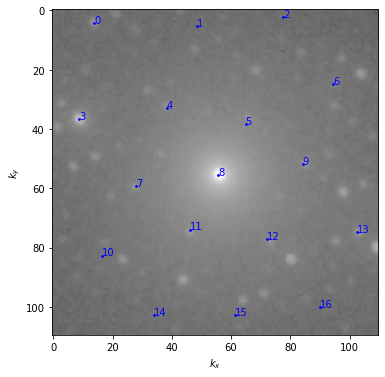

In [41]:
com=COM(data=(I[0,25,25,:,:])**2)
com.visualize()

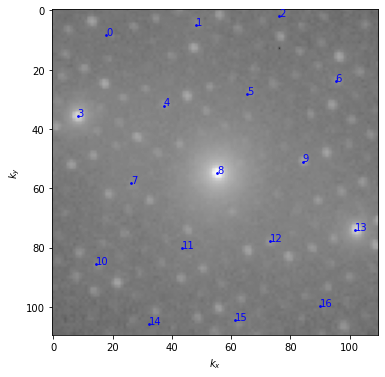

In [42]:
com=COM(data=(I[0,50,50,:,:]))
com.visualize()

In [136]:
com_log_ij=com_log.generate_com()

In [138]:
np.linalg.norm(com_log_ij-com_ij,axis=1)

array([0.03546963, 0.01064384, 0.0404077 , 0.16479806, 0.07258941,
       0.19166896, 0.02628062, 0.18334745, 0.1184803 , 0.25415899,
       0.16175796, 0.07579107, 0.20126868, 0.19363746, 0.12896028])

In [141]:
np.hstack([com_ij,com_log_ij])

array([[ 12.3958686 ,  10.37114781,  12.38058377,  10.33914049],
       [ 14.27272603,  39.88387866,  14.27687173,  39.87407537],
       [ 16.4446559 ,  69.17820395,  16.40797578,  69.16125251],
       [ 38.48185627,  23.9662595 ,  38.40609007,  24.112608  ],
       [ 40.42986173,  52.92961097,  40.37217342,  52.88555101],
       [ 42.73088997,  81.92121746,  42.90195397,  81.83476459],
       [ 62.77350254,   7.36640059,  62.75616769,   7.34664777],
       [ 64.72729367,  36.97576189,  64.80014404,  37.144015  ],
       [ 66.764176  ,  65.85950536,  66.87703606,  65.8955635 ],
       [ 88.88102081,  20.7281919 ,  88.90686856,  20.98103312],
       [ 90.7551726 ,  49.46398412,  90.80429909,  49.30986655],
       [ 92.69425203,  78.76400871,  92.76976149,  78.77053616],
       [113.94124938,   3.45700285, 113.93032555,   3.25603083],
       [115.14708712,  33.81343892, 115.07339376,  33.99250527],
       [116.82830406,  62.95710588, 116.7364058 ,  63.04757943]])

In [124]:
data,lbl=com.generate_mask_ordered(com.x_i)


In [125]:
com.x_i[0]

array([9, 7])

In [110]:
%matplotlib inline

In [126]:
com.data[9-1:9+1+1,7-1:7+1+1]

array([[5.158165 , 5.13232  , 5.186638 ],
       [5.1228843, 5.105419 , 5.1342344],
       [5.1830287, 5.108748 , 5.1696396]], dtype=float32)

In [127]:
data[9-1:9+1+1,7-1:7+1+1]

array([[0.09387207, 0.06802702, 0.12234497],
       [0.05859137, 0.04112625, 0.06994152],
       [0.11873579, 0.04445505, 0.10534668]])

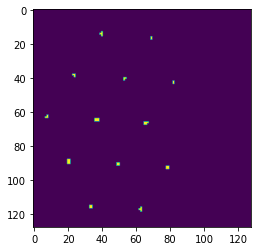

In [111]:
plt.imshow(data[])

In [128]:
com.generate_com()

array([[ 12.28153282,  10.38298467],
       [ 14.26241331,  40.06988682],
       [ 16.145881  ,  69.01367161],
       [ 38.22955998,  23.88667392],
       [ 40.38742779,  53.19965447],
       [ 42.30435014,  81.93837506],
       [ 62.4020586 ,   7.3963574 ],
       [ 64.80674438,  37.13990475],
       [ 66.40670832,  65.88740238],
       [ 88.89005907,  20.95519043],
       [ 90.41050323,  49.76238688],
       [ 92.54814499,  78.58092236],
       [114.00286156,   3.42318401],
       [115.16260392,  33.95216978],
       [116.90546121,  63.05074653]])

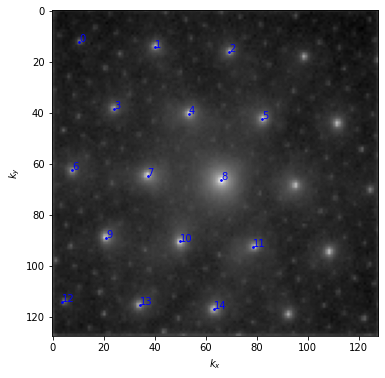

In [129]:
com.visualize()


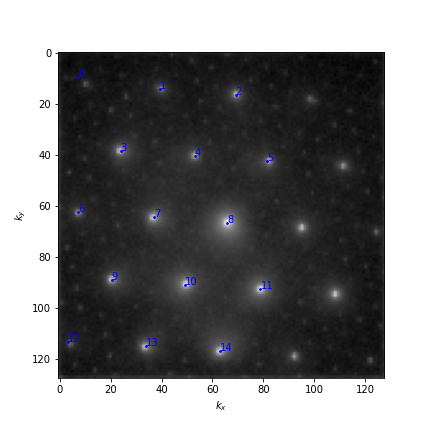

In [31]:
com.visualize()


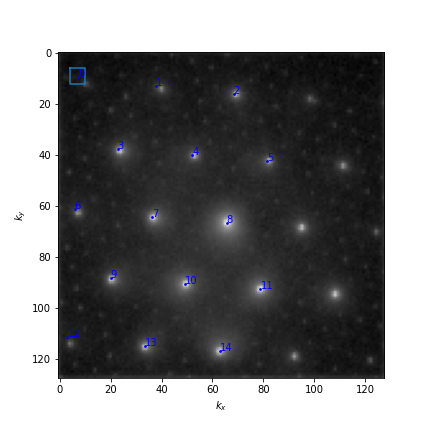

In [9]:
com.visualize()
xx=np.array([7,9])
xx_list=np.array([xx+np.array([-3,-3]),xx+np.array([3,-3]),xx+np.array([3,3]),xx+np.array([-3,3]),xx+np.array([-3,-3])])
plt.plot(*xx_list.T)


In [207]:
com.lines

{0: [deque([0, 1, 2]),
  deque([3, 4, 5]),
  deque([6, 7, 8]),
  deque([9, 10, 11]),
  deque([12, 13, 14])],
 1: [deque([0]),
  deque([6, 3, 1]),
  deque([12, 9, 7, 4, 2]),
  deque([13, 10, 8, 5]),
  deque([14, 11])],
 2: [deque([14, 10, 7, 3, 0]),
  deque([11, 8, 4, 1]),
  deque([5, 2]),
  deque([13, 9, 6]),
  deque([12])]}

In [202]:
com.x_i

array([[ 12,  10],
       [ 14,  40],
       [ 16,  69],
       [ 39,  24],
       [ 40,  53],
       [ 42,  82],
       [ 63,   7],
       [ 65,  37],
       [ 67,  66],
       [ 89,  20],
       [ 91,  50],
       [ 93,  79],
       [114,   4],
       [115,  34],
       [117,  63]])

In [200]:
com_ij=com.generate_com()
# com_ij=com.generate_x_i()

In [201]:
com_ij

array([[ 12.13589008,  10.12740416],
       [ 14.14492704,  39.93829294],
       [ 16.3129124 ,  69.12540534],
       [ 38.69815531,  23.97344378],
       [ 40.27986574,  52.95417253],
       [ 42.37185365,  81.95007724],
       [ 62.88285367,   7.18950537],
       [ 64.80153849,  36.98236076],
       [ 66.81500132,  65.88978508],
       [ 88.91594438,  20.45764255],
       [ 90.81791645,  49.64140208],
       [ 92.76578264,  78.81921956],
       [113.99838541,   4.11670156],
       [115.10812759,  33.86285406],
       [116.86584687,  62.96648505]])

In [ ]:
com_ij

array([[  9.02060704,   7.01781514],
       [ 12.04839267,  37.05053118],
       [ 15.05882374,  67.07619238],
       [ 36.07608341,  21.08347486],
       [ 39.05143586,  51.05823005],
       [ 42.03097366,  81.02687951],
       [ 60.05308968,   5.04524351],
       [ 63.06908986,  35.08796954],
       [ 66.04205016,  65.04657968],
       [ 87.07465342,  19.07796223],
       [ 90.03735129,  49.02031203],
       [ 92.98525496,  78.98530458],
       [111.03512483,   2.99851536],
       [114.05155578,  33.04619212],
       [116.9805738 ,  63.00350648]])

In [246]:
average_dist_direction(com_ij,com.lines)

{0: [array([29.89308213, 29.17352117]),
  array([29.00878692, 29.3170896 ]),
  array([29.77347284, 28.92701698]),
  array([29.152959  , 29.62903213]),
  array([29.28614584, 29.53166575])],
 1: [array([], dtype=float64),
  array([29.40513991, 28.91854117]),
  array([29.62069848, 29.45781587, 28.77035509, 29.03905246]),
  array([29.45240147, 29.10955894, 28.98978974]),
  array([28.91503613])],
 2: [array([29.37634815, 28.87495975, 29.08496576, 29.3245926 ]),
  array([29.07230817, 29.14120117, 29.04507344]),
  array([29.2287344]),
  array([29.68620038, 29.06743913]),
  array([], dtype=float64)]}

In [247]:
average_dist_direction(com.generate_com(),com.lines)

{0: [array([29.87850932, 29.26751938]),
  array([29.02385995, 29.07127282]),
  array([29.85457391, 28.97746044]),
  array([29.24567177, 29.24276348]),
  array([29.76684593, 29.15666157])],
 1: [array([], dtype=float64),
  array([29.43807438, 29.28715465]),
  array([29.93585143, 29.23304437, 29.26450419, 28.91234379]),
  array([28.96509856, 28.98533914, 29.24722982]),
  array([28.84652989])],
 2: [array([29.25837514, 28.93273663, 29.16536532, 29.95441115]),
  array([28.99333246, 29.52022175, 29.19671458]),
  array([29.04377091]),
  array([29.42329277, 29.21926207]),
  array([], dtype=float64)]}

In [253]:
average_dist_direction(com.generate_com(),com.lines)

{0: [array([30.85750382, 30.48630989]),
  array([29.3893151 , 29.55705116]),
  array([30.52037321, 29.43073458]),
  array([29.36051179, 29.54833045]),
  array([30.61465584, 29.51407738])],
 1: [array([], dtype=float64),
  array([28.88276883, 29.06606064]),
  array([28.89684702, 29.04059732, 28.96050505, 28.91921852]),
  array([28.96952686, 28.98314578, 28.91222419]),
  array([28.84652989])],
 2: [array([29.65321723, 29.44214968, 29.80621426, 32.18979397]),
  array([29.35908025, 29.96899753, 30.44062795]),
  array([29.56038056]),
  array([29.76187419, 30.61699224]),
  array([], dtype=float64)]}

In [82]:
com_ij

array([[  9.00837061,   7.0019752 ],
       [ 12.02612927,  37.02304583],
       [ 15.04621943,  67.06290319],
       [ 36.03971507,  21.04267905],
       [ 39.04452289,  51.05480452],
       [ 42.02833967,  81.03728776],
       [ 60.02668536,   5.02468557],
       [ 63.06159295,  35.07227064],
       [ 66.03594828,  65.04666654],
       [ 87.06600817,  19.06495289],
       [ 90.03985015,  49.02774526],
       [ 92.98305497,  78.98616908],
       [111.01796268,   3.00833122],
       [114.05656157,  33.03910869],
       [116.99074285,  62.99770513]])

In [ ]:
com.generate_mask()

In [ ]:
%matplotlib widget

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))

vmin,vmax=np.nanmin(data),np.nanmax(data)
im=ax.imshow(data,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax))
# cb=plt.colorbar(im)
# cb.ax.set_title(r'$ I(k_x,k_y) $')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_aspect('equal')

# mask_ind=peak_local_max(np.log10(data),threshold_rel=0,min_distance=8)
# ax.scatter(mask_ind[:,1],mask_ind[:,0])
# ax.scatter(brag_peaks[:,1],brag_peaks[:,0])
# ax.scatter([66],[65],c='y')
# ax.scatter(com.k2[1],com.k2[0])
# ax.scatter(com.k1[1],com.k1[0])
# ax.scatter(com.k0[1],com.k0[0])

ax.scatter(com_ij[:,1],com_ij[:,0],color='b',s=3)
# [ax.text(com_ij[idx,1],com_ij[idx,0],f'{idx}',color='r') for idx in range(com_ij.shape[0])]
# ax.scatter(q.bragg_peaks[:,1],q.bragg_peaks[:,0],color='y',s=3)
# [ax.text(com_ij[idx,1],com_ij[idx,0],f'{idx}',color='b') for idx in range(com_ij.shape[0])]
[ax.text(com_ij[idx,1],com_ij[idx,0],f'{com.i_range[idx]}',color='b') for idx in range(com_ij.shape[0])]

In [ ]:
com.generate_mask_ordered()

In [ ]:
plt.imshow(com.generate_mask())

# plt.savefig('tmp.png')

In [ ]:
np.max()

In [ ]:
z=np.arange(16).reshape((4,4))

In [ ]:
z[[0,1,2],[2,0,1]]

In [ ]:
z

In [ ]:
ii,jj=np.ogrid[-1:2,-1:2]

In [ ]:
ii

In [ ]:
jj

In [ ]:
com.x_i

In [ ]:
brag_peaks=np.array([[ 55,  55],
       [ 59,  26],
       [ 73, 101],
       [ 86,  15],
       [ 32,  37],
       [ 36,   8],
       [ 78,  73],
       [ 51,  84],
       [ 28,  66],
       [ 24,  95],
       [ 82,  44],
       [  9,  19],
       [101,  91],
       [106, 62],
       [110,35],
       [5,49],
       [2,78]       ])

In [ ]:
(com.generate_com())

In [ ]:
average_dist_direction()

In [ ]:
T[9]

In [ ]:
def generate_mask_arc(center,radius):
    i,j=np.mgrid[:400,:180]
    return (i-center[1])**2+(j-center[0])**2<=radius**2
def generate_mask_rect(xmin,xmax,ymin,ymax):
    '''
    x: (min,max)
    y: (min,max)
    '''
    mask=np.full((400,180),False)
    mask[xmin:xmax,ymin:ymax]=True
    return mask
disk1=generate_mask_arc([(20+152)/2,95],(152-20)/2)
disk2=generate_mask_arc([(20+152)/2,315],(152-20)/2)
mask=generate_mask_rect(95, 315,20, 152)
mask_stadium=mask| disk1 | disk2

In [203]:
ave_dist=np.zeros((I.shape[0],I.shape[1],I.shape[2],3))
# b1_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
# b2_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
for T_idx in [9]:
# for T_idx in range(I.shape[0]):
    for i in range(I.shape[1]):
        print(f'{T_idx}:{i}',end='\r')
        for j in range(I.shape[2]):
            if mask_stadium[i,j]:
                com=COM(data=(I[T_idx,i,j]),k0=[66,65],k1=[69,95],k2=[42,81],i_range=np.array([[-3,2],[-2,2],[-1,2],[0,2],
                    [-2,1],[-1,1],[0,1],[1,1],
                    [-2,0],[-1,0],[0,0],[1,0],[2,0],
                    [-1,-1],[0,-1],[1,-1],[2,-1],
                    [-1,-2],[0,-2],[1,-2],[2,-2],[3,-2]]),
crop=crop)
                com_ij=com.generate_com()
                ave_dist[T_idx,i,j]=average_dist_direction(com_ij,com.lines)
# np.save('strainmap_3.npy',ave_dist)

In [146]:
ave_dist_log=ave_dist.copy()

In [204]:
ave_dist_linear=ave_dist.copy()

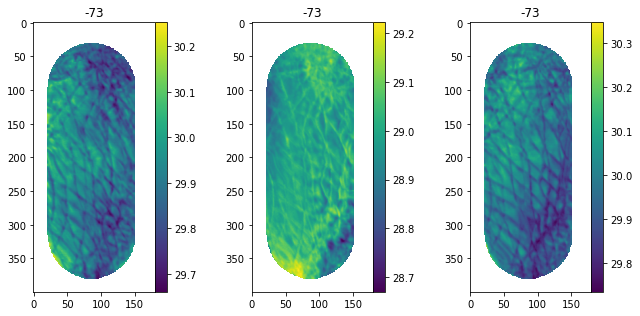

In [128]:
fig,axs=plt.subplots(1,3,figsize=(10,10),gridspec_kw=dict(wspace=0.8))
for idx in range(3):
    im=axs[idx].imshow(ave_dist_linear[9,:,:,idx]*np.where(~mask_stadium,np.nan,1))
    ax_inset=axs[idx].inset_axes([1,0,0.1,1],transform=axs[idx].transAxes)
    plt.colorbar(im,cax=ax_inset)
    axs[idx].set_title(T[9])
    axs[idx].set_aspect('equal')

In [220]:
z=ave_dist_linear[9,:,:,idx]


In [222]:
np.quantile(z[z>0],q=[.05,.95])

array([29.17873219, 29.36723353])

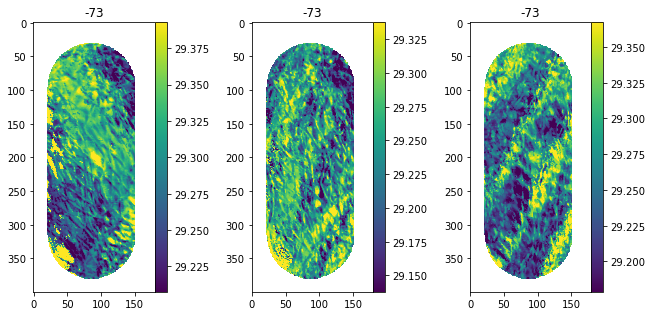

In [223]:
fig,axs=plt.subplots(1,3,figsize=(10,10),gridspec_kw=dict(wspace=0.8))
for idx in range(3):
    data_r=ave_dist_linear[9,:,:,idx]
    vmin,vmax=np.quantile(data_r[data_r>0],q=[.05,.95])
    im=axs[idx].imshow(data_r*np.where(~mask_stadium,np.nan,1),vmin=vmin,vmax=vmax)
    ax_inset=axs[idx].inset_axes([1,0,0.1,1],transform=axs[idx].transAxes)
    plt.colorbar(im,cax=ax_inset)
    axs[idx].set_title(T[9])
    axs[idx].set_aspect('equal')

In [225]:
def triangle_area(a, b, c):
    # calculate the semi-perimeter
    s = (a + b + c) / 2.0
    # calculate the area
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))
    return area

In [226]:
ave_area=triangle_area(ave_dist_linear[9,:,:,0], ave_dist_linear[9,:,:,1], ave_dist_linear[9,:,:,2])

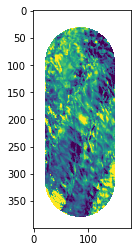

In [230]:
vmin,vmax=np.quantile(ave_area[ave_area>0],q=[.05,.95])
plt.imshow(ave_area*np.where(~mask_stadium,np.nan,1),vmin=vmin,vmax=vmax)

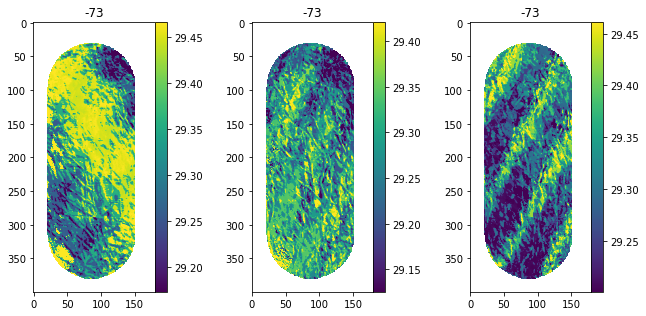

In [228]:
fig,axs=plt.subplots(1,3,figsize=(10,10),gridspec_kw=dict(wspace=0.8))
for idx in range(3):
    data_r=ave_dist_log[9,:,:,idx]
    vmin,vmax=np.quantile(data_r[data_r>0],q=[.05,.95])
    im=axs[idx].imshow(data_r*np.where(~mask_stadium,np.nan,1),vmin=vmin,vmax=vmax)
    ax_inset=axs[idx].inset_axes([1,0,0.1,1],transform=axs[idx].transAxes)
    plt.colorbar(im,cax=ax_inset)
    axs[idx].set_title(T[9])
    axs[idx].set_aspect('equal')

In [173]:
zz=ave_dist_log[9,:,:,2]*np.where(~mask_stadium,np.nan,1)


(array([3.5000e+01, 1.0273e+04, 2.1265e+04, 1.0748e+04, 3.7800e+02,
        8.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([28.97374027, 29.10597686, 29.23821345, 29.37045004, 29.50268663,
        29.63492322, 29.76715981, 29.8993964 , 30.03163299, 30.16386958,
        30.29610617]),
 <BarContainer object of 10 artists>)

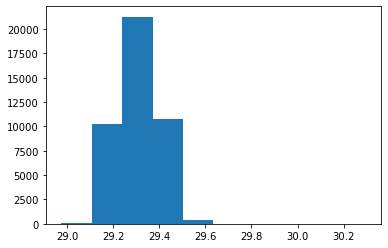

In [174]:
plt.hist(zz.flatten())

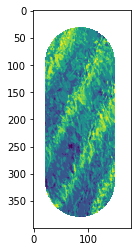

In [176]:
plt.imshow(zz,vmin=29.1,vmax=29.5)

In [162]:
np.nanmax(zz)

30.751077962382887

In [125]:
ave_dist_log[9,80,100]

array([30.1370185 , 28.85664202, 30.39073845])

In [ ]:
with open('q_Txy_count_pts_outlier_sample_2_auto_bragg.pickle','rb') as f:
    rs=pickle.load(f)

In [ ]:
with open('q_Txy_count_pts_outlier_sample_3_auto_bragg.pickle','rb') as f:
    rs=pickle.load(f)

In [ ]:
ave_dist=np.load('strainmap.npy')

In [ ]:
ave_dist.shape

In [ ]:
def generate_mask_line(x,y):
    '''
    x: (min,max)
    y: (min,max)
    '''
    i_idx,j_idx=np.meshgrid(np.arange(200),np.arange(200),indexing='ij')
    x_min,x_max=x
    y_min,y_max=y
    return (i_idx<((y_max-y_min)/(x_max-x_min)*j_idx+y_min))

In [ ]:
mask=generate_mask_line((0,81), (178,199))

In [ ]:
data[:,:,0]

In [ ]:
T_idx_list=np.arange(34)
fig,axs=plt.subplots(T_idx_list.shape[0],6,figsize=(20,3*T_idx_list.shape[0]),tight_layout=True)
for T_idx in T_idx_list:
    data=ave_dist[T_idx,:,:]*np.where(mask[:,:,np.newaxis]==0,np.nan,1)
    ax=axs[T_idx]
    for i in range(3):
        im=ax[i].imshow(data[:,:,i])
        ax[i].set_title(f'$b_{i}$')
        axins=ax[i].inset_axes([1.05,0,.07,1],transform=ax[i].transAxes)
        cbar=plt.colorbar(im,cax=axins)

    im=ax[3].imshow(data.mean(axis=-1))
    axins=ax[3].inset_axes([1.05,0,.07,1],transform=ax[3].transAxes)
    cbar=plt.colorbar(im,cax=axins)
    im=ax[4].imshow(data[:,:,1]/data[:,:,0])
    axins=ax[4].inset_axes([1.05,0,.07,1],transform=ax[4].transAxes)
    cbar=plt.colorbar(im,cax=axins)
    im=ax[5].imshow(data[:,:,2]/data[:,:,0])
    axins=ax[5].inset_axes([1.05,0,.07,1],transform=ax[5].transAxes)
    cbar=plt.colorbar(im,cax=axins)

    ax[3].set_title(f'$(b_0+b_1+b_2)/3$')
    ax[4].set_title(f'$b_1/b_0$')
    ax[5].set_title(f'$b_2/b_0$')

    [ax.set_xlabel('y') for ax in ax]
    [ax.set_ylabel('x') for ax in ax]
    [ax.text(-0.2,1.05,f'T={T[T_idx]+273}(K)',transform=ax.transAxes) for ax in ax]
# plt.colorbar()

# fig.savefig('strainmap_3.png',dpi=300)


In [ ]:
with open('count_pts_outlier.pickle','rb') as f:
    count_pts_outlier_sample_2=pickle.load(f)

In [ ]:
ave_dist[10,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

In [ ]:
ave_dist[10,:,:,1][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

In [ ]:
ave_dist[10,:,:,2][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

In [ ]:
(29.137189943024797+28.48824727588973+29.167092653116764)/3

In [ ]:
count_pts_outlier_sample_2.ij.keys()

In [ ]:
ave_dist[1].shape

In [ ]:
import scipy.stats

def t_test_confidence_interval(data, confidence_level=0.95):
    mean = np.mean(data)  # Compute the mean of the data
    sem = scipy.stats.sem(data)  # Compute the standard error of the mean
    deg_freedom = len(data) - 1  # Calculate the degrees of freedom
    t_value = scipy.stats.t.ppf((1 + confidence_level) / 2, deg_freedom)  # Calculate the t-value

    margin_of_error = t_value * sem  # Calculate the margin of error

    return margin_of_error,mean

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    # lower_bound = mean - sem
    # upper_bound = mean + sem

    return lower_bound, upper_bound, mean


In [ ]:
b_ave={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}
b_ave_err={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}
a_ave={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}
a_ave_err={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}


for T_idx in range(T.shape[0]):
    b=[ave_dist[T_idx,:,:,idx] for idx in range(3)]
    a=[1/ave_dist[T_idx,:,:,idx] for idx in range(3)]

    for key in range(count_pts_outlier_sample_2.k):
        val=count_pts_outlier_sample_2.ij[key]
        b_list=[b[idx][tuple(np.array(val).T)] for idx in range(3)]
        a_list=[a[idx][tuple(np.array(val).T)] for idx in range(3)]

        for idx in range(3):
            b_ave_err[idx][T_idx,key],b_ave[idx][T_idx,key]=t_test_confidence_interval(b_list[idx])
            a_ave_err[idx][T_idx,key],a_ave[idx][T_idx,key]=t_test_confidence_interval(a_list[idx])

        b_ave_err['ave'][T_idx,key],b_ave['ave'][T_idx,key]=t_test_confidence_interval((b_list[0]+b_list[1]+b_list[2])/3)
        a_ave_err['ave'][T_idx,key],a_ave['ave'][T_idx,key]=t_test_confidence_interval((a_list[0]+a_list[1]+a_list[2])/3)

In [ ]:
b_ave_all=b_ave['ave'].mean()
a_ave_all=a_ave['ave'].mean()
    
b_ave_pct={key:100*(b_ave[key]-b_ave_all)/b_ave_all for key in b_ave.keys()}
a_ave_pct={key:100*(a_ave[key]-a_ave_all)/a_ave_all for key in a_ave.keys()}

b_ave_err_pct={key:100*(b_ave_err[key])/b_ave_all for key in b_ave_err.keys()}
a_ave_err_pct={key:100*(a_ave_err[key])/a_ave_all for key in a_ave_err.keys()}

In [ ]:
b_ave['ave'].mean()

In [ ]:
ave_dist.mean()

In [ ]:
(1/ave_dist).mean()

In [ ]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)]

In [ ]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

In [ ]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].std()

In [ ]:
scipy.stats.sem(ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)])

In [ ]:
scipy.stats.sem(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)])


In [ ]:
t_test_confidence_interval(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)])

In [ ]:
a_ave_err[0][0,3]

In [ ]:
a_ave_ub[0][0,3]

In [ ]:
a_ave[0][0,3]

In [ ]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)]).mean()

In [ ]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[1]).T)]).mean()

In [ ]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[2]).T)]).mean()

In [ ]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)]).mean()

In [ ]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[2]).T)]).mean()

In [ ]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)].mean()

In [ ]:
count_pts_outlier_sample_2.ij[0]

In [ ]:
a_ave_ub[0][0,0]

In [ ]:
a_ave[0][0,0]

In [ ]:
fig,axs=plt.subplots(5,1,figsize=(8,10))
cmap = plt.get_cmap('plasma', count_pts_outlier_sample_2.k)
color_list=[cmap(idx) for idx in range(count_pts_outlier_sample_2.k)]
ax=axs[0]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b0_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$b_0$')

ax=axs[1]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b1_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$b_1$')
ax=axs[2]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b2_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$b_2$')
ax=axs[3]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$(b_0+b_1+b_2)/3$')

ax=axs[4]
count_pts_outlier_sample_2.GMM_plot_single('mean', [0,1,2,3], errorbar=False,cond=None,ax=ax)
ax.set_ylabel('Order parameter')

[ax.set_xlim(T[0]+273,T[-1]+273) for ax in axs]


In [ ]:
a_ave_all=a_ave['ave'].mean()

# a0_ave_pct=(a0_ave-a_ave_all)/a_ave_all
# a1_ave_pct=(a1_ave-a_ave_all)/a_ave_all
# a2_ave_pct=(a2_ave-a_ave_all)/a_ave_all
# a_ave_pct=(a_ave-a_ave_all)/a_ave_all

# a_ave_lb_pct={key:(a_ave_lb[key]-a_ave_all)/a_ave_all for key in a_ave_lb.keys()}
# a_ave_ub_pct={key:(a_ave_ub[key]-a_ave_all)/a_ave_all for key in a_ave_ub.keys()}
a_ave_pct={key:(a_ave[key]-a_ave_all)/a_ave_all for key in a_ave.keys()}

In [ ]:
a_ave_ub[0][:,3]

In [ ]:
a_ave_lb[0][:,3]

In [ ]:
color_list[i]

In [ ]:
fig,axs=plt.subplots(5,1,figsize=(8,12))
cmap = plt.get_cmap('plasma', count_pts_outlier_sample_2.k)
color_list=[cmap(idx) for idx in range(count_pts_outlier_sample_2.k)]

for idx in range(3):
    ax=axs[idx]
    for i in range(count_pts_outlier_sample_2.k):
        ax.errorbar(T[:]+273,a_ave_pct[idx][:,i],a_ave_err_pct[idx][:,i],fmt='.-', capsize=3,color=color_list[i],label=str(i))
    ax.legend()
    ax.set_xlabel('T (K)')
    ax.set_ylabel(f'$a_{idx}$ (%)')

ax=axs[3]
for i in range(count_pts_outlier_sample_2.k):
        ax.errorbar(T[:]+273,a_ave_pct['ave'][:,i],a_ave_err_pct['ave'][:,i],fmt='.-', capsize=3,color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$(a_0+a_1+a_2)/3$ (%)')

ax=axs[4]
count_pts_outlier_sample_2.GMM_plot_single('mean', [0,1,2,3], errorbar=False,cond=None,ax=ax)
ax.set_ylabel('Order parameter')

[ax.set_xlim(T[0]+273,T[-1]+273) for ax in axs]


In [ ]:
fig,axs=plt.subplots(2,1,figsize=(8,6))
cmap = plt.get_cmap('plasma', count_pts_outlier_sample_2.k)
color_list=[cmap(idx) for idx in range(count_pts_outlier_sample_2.k)]
ax=axs[0]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$(b_0+b_1+b_2)/3$')

ax=axs[1]
count_pts_outlier_sample_2.GMM_plot_single('mean', [0,1,2,3], errorbar=False,cond=None,ax=ax)


In [ ]:
count_pts_outlier_sample_2.ij[0]

In [ ]:
plt.imshow(ave_dist[10])
plt.colorbar()

In [ ]:
plt.imshow(ave_dist[0])
plt.colorbar()

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(com_i)

In [ ]:
distances, indices = nbrs.kneighbors(com_i)

In [ ]:
distances[:,1].mean()

In [ ]:
mask=com.generate_mask()

In [ ]:
plt.imshow(com.generate_mask())

In [ ]:
lbl=ndimage.label(mask)

In [ ]:
lbl[1]

In [ ]:
ndimage.center_of_mass(data,lbl[0],range(1,lbl[1]+1))

In [ ]:
zz=(com.generate_x_i())

In [ ]:
np.vstack(zz).shape

In [ ]:
b = np.array(([0,1,1,0],
              [0,1,0,0],
              [0,0,0,0],
              [0,0,1,1],
              [0,0,1,1]))

In [ ]:
lbl = ndimage.label(b)[0]

In [ ]:
lbl.min()

In [ ]:
ndimage.center_of_mass(b, lbl, [1,2])

# Test q_stat.py

In [ ]:
import q_stat

In [ ]:
import importlib

In [ ]:
importlib.reload(q_stat)

In [ ]:
q=q_stat.q_stat(8,x,y,workingdir,auto=True)

In [ ]:
q.bragg_peaks

In [ ]:
q.count_pts(visualization=True,remove_central_shell=True)

In [ ]:
q.count_pts(visualization=True,remove_central_shell=True)

In [ ]:
q.count_pts(visualization=True,remove_central_shell=True)

In [ ]:
q.visualize_grid()

In [ ]:
q.bragg_peaks

In [ ]:
q.count_pts

# Calculate angle

In [ ]:
T[:]+273

In [ ]:
angle=[np.load(f'angle/cluster_{idx}_phi.npy') for idx in range(4)]
angle_err=[np.load(f'angle/cluster_{idx}_phi_error.npy') for idx in range(4)]

In [ ]:
fig,ax=plt.subplots()
cmap = plt.get_cmap('plasma', 4)
color_list=[cmap(idx) for idx in range(4)]
for i in range(4):
    ax.errorbar(T[:]+273, np.abs(angle[i]), yerr=angle_err[i], fmt='.-', capsize=3, label=f'Cluster {i}',color=color_list[i])
ax.set_xlabel("T(K)")
ax.set_ylabel("angle (deg)")
ax.legend()
ax.axhline(y=13.9,lw=1,ls='dashed',color='k')

In [ ]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('plasma', 4)
color_list = [cmap(idx) for idx in range(4)]

for i in range(4):
    ax.plot(T[:]+273, np.abs(angle[i]), '.-', label=f'Cluster {i}', color=color_list[i])
    ax.fill_between(T[:]+273, np.abs(angle[i]) - angle_err[i], np.abs(angle[i]) + angle_err[i],
                    color=color_list[i], alpha=0.5)

ax.set_xlabel("T(K)")
ax.set_ylabel("angle (deg)")
ax.legend()
ax.axhline(y=13.9,lw=1,ls='dashed',color='k')
ax.set_yticks(np.arange(12.1,13.9,0.2))

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(6,6),gridspec_kw=dict(hspace=0))
ax=axs[0]
cmap = plt.get_cmap('plasma', 4)
color_list = [cmap(idx) for idx in range(4)]

for i in range(4):
    ax.plot(T[:]+273, np.abs(angle[i]), '.-', label=f'Cluster {i}', color=color_list[i])
    # ax.fill_between(T[:]+273, np.abs(angle[i]) - angle_err[i], np.abs(angle[i]) + angle_err[i],
                    # color=color_list[i], alpha=0.5)

ax.set_xlabel("T(K)")
ax.set_ylabel("angle (deg)")
ax.legend()
ax.axhline(y=13.9,lw=1,ls='dashed',color='k')
ax.set_yticks(np.arange(12.1,13.9,0.2))
ax.set_xticklabels([])
# ax2=ax.twinx()
ax=axs[1]
count_pts_outlier_auto.GMM_plot_single('mean', [0,1,2,3],errorbar=False,cond=None,ax=ax,ylim=[3,6])

[ax.axvline(x=155,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=160,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=185,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=187,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=216,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=218,lw=1,ls='dashed',color='grey') for ax in axs]


In [ ]:
import pickle
from GMM import GMM_model

In [ ]:
with open('count_pts_outlier_auto.pickle','rb') as f:
    count_pts_outlier_auto=pickle.load(f)